## Regression Analysis

We will try applying the regression methods that we have, available to us in the Shogun ML Library.

We start off by importing the necessary libraries.

In [1]:
import pandas as pd
import shogun as sg
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

%matplotlib inline


In [2]:
def load(path, is_labels=False):
    if path.exists() and path.is_file():
        df = pd.read_csv(path)
        if is_labels:
            df = pd.Series(df['incidence'])
        return df.values

Let's consider Italy. Most probably, what we will compute will remain the same for all the different countries.

In [3]:
country = 'italy'

getting all the datasets which we separated into the training and testing sets using test.py

In [4]:
path = Path.cwd()
country = 'italy'
test_data_path = path.parent / 'data' / 'test' / country
x_train_file_path = test_data_path / 'X_train.csv'
y_train_file_path = test_data_path / 'y_train.csv'
x_test_file_path = test_data_path / 'X_test.csv'
y_test_file_path = test_data_path / 'y_test.csv'

X_train = pd.read_csv(x_train_file_path)
y_train = pd.read_csv(y_train_file_path).values
X_test = pd.read_csv(x_test_file_path)
y_test = pd.read_csv(y_test_file_path).values

Using Shogun to apply Linear Ridge Regression.

The first step is creating features and labels from the CSV files.

In [5]:
features_train = sg.create_features(load(x_train_file_path).T)
features_test = sg.create_features(load(x_test_file_path).T)
labels_train = sg.create_labels(load(y_train_file_path, is_labels=True))
labels_test = sg.create_labels(load(y_test_file_path, is_labels=True))

We then create an instance of the Linear Ridge Regression.

In [6]:
lrr = sg.create_machine("LinearRidgeRegression", tau=57, labels=labels_train, use_bias=False)

We also have to set up the cross validation splitting strategy for implementing cross validation.

strategy = sg.create_splitting_strategy("CrossValidationSplitting", labels=labels_train,
                                        num_subsets=5, seed=1)

evaluation_criterium = sg.create_evaluation("MeanSquaredError")
cross_validation = sg.create_machine_evaluation("CrossValidation", machine=lrr,
                                                features=features_train, labels=labels_train,
                                                splitting_strategy=strategy,
                                                evaluation_criterion=evaluation_criterium,
                                                num_runs=10)
result = cross_validation.evaluate()

We can now get the mean and the std deviation

mean = result.get("mean")
print('mean =\t' + str(mean))

stddev = result.get("std_dev")
print('standard deviation =\t' + str(stddev))

Finally we have to train and apply the model.

In [7]:
lrr.train(features_train)
labels_predict = lrr.apply(features_test)
labels_train_predict = lrr.apply(features_train)

We also find the mean squared error of this model as a measure of its accuracy

In [8]:
eval = sg.create_evaluation("MeanSquaredError")
mse = eval.evaluate(labels_predict, labels_test)
print('Mean Squared Error for Linear Ridge Regression is '+str(mse))

Mean Squared Error for Linear Ridge Regression is 7.9536753950386405


Before we plot them, we have to convert all the labels into numpy style arrays.

In [9]:
y_train_predicted = labels_train_predict.get("labels").reshape(labels_train_predict.get("labels").shape[0])
y_test_predicted = labels_predict.get("labels").reshape(labels_predict.get("labels").shape[0])
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

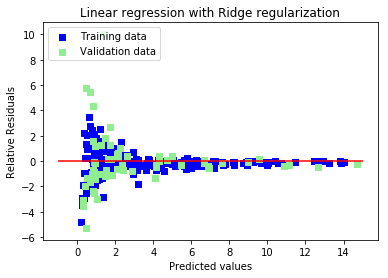

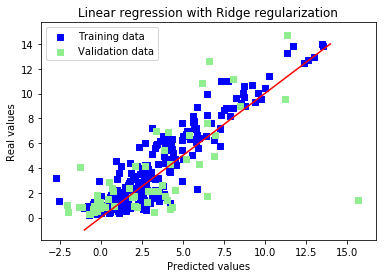

In [10]:
# Plot residuals
plt.scatter(y_train, (y_train_predicted - y_train)/y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, (y_test_predicted - y_test)/y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Relative Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = -1, xmax = 15, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_predicted, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_predicted, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([-1, 14], [-1, 14], c = "red")
plt.show()

Now that we have successfully implemented Linear Ridge regression, we start off with implementing Random Forest

We re-initialize the arrays.

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
X_train


Acrocianosi  Acroosteolisi  Adiadococinesia  Alfuy_virus   Alitosi  \
0   -2.045797    -0.522034      -1.764694        -0.313195    -1.452047   
1   -2.045797    -0.522034      -1.764694        -0.313195    -1.452047   
2   -2.045797    -0.522034      -1.764694        -0.313195    -1.452047   
3   -2.045797    -0.522034      -1.764694        -0.313195    -1.452047   
4   -2.045797    -0.522034      -1.496087        -0.313195    -0.927387   
5   -2.033580    -0.522034      -1.496087        -0.313195    -1.070849   
6   -2.033580    -0.522034      -1.509517        -0.313195    -1.083145   
7   -1.532698    -0.522034      -1.187189        -0.313195    -0.771628   
8   -1.874764    -0.522034      -1.214049        -0.313195    -0.915090   
9   -1.642648    -0.522034      -1.173758        -0.313195    -0.812617   
10  -1.044033    -0.522034      -1.281201        -0.313195    -0.919189   
11  -1.239499    -0.522034      -1.348353        -0.313195    -0.915090   
12  -0.970733    -0.522034      -1.267771        -0.313195    -0.779826   
13  -0.934083    -0.522034      -1.066316        -0.313195    -0.800321   
14  -1.031817    -0.522034      -1.428935        -0.313195    -0.706046   
15  -0.909650    -0.522034      -1.415505        -0.313195    -0.956079   
16  -0.909650    -0.522034      -1.348353        -0.313195    -0.767529   
17  -1.605998    -0.522034      -1.442365        -0.313195    -0.898694   
18  -1.386099    -0.522034      -1.334923        -0.313195    -0.681452   
19  -1.129550    -0.522034      -1.348353        -0.313195    -0.792123   
20  -1.141766    -0.522034      -1.240910        -0.313195    -0.738837   
21  -1.471615    -0.522034      -0.985734        -0.313195    -0.525694   
22  -1.263932    -0.522034      -1.160328        -0.313195    -0.603573   
23  -1.153983    -0.522034      -0.784278        -0.313195    -0.644562   
24  -1.031817    -0.522034      -0.905152        -0.313195    -0.578979   
25  -0.714184    -0.522034      -0.891721        -0.313195    -0.800321   
26  -0.592018    -0.522034      -0.958873        -0.313195    -0.665057   
27  -0.934083    -0.522034      -1.052885        -0.313195    -0.673254   
28  -0.787484    -0.522034      -1.133467        -0.313195    -0.726540   
29  -0.323252    -0.522034      -1.187189        -0.313195    -0.706046   
30  -1.410532    -0.522034      -1.375214        -0.313195    -0.886398   
31  -1.520482    -0.522034      -1.348353        -0.313195    -0.935585   
32  -0.640884    -0.522034      -0.905152        -0.313195    -0.595375   
33  -0.115569    -0.522034      -0.461950        -0.313195    -0.677353   
34   0.189846    -0.522034      -0.878291        -0.313195    -0.226473   
35   0.104330    -0.522034      -0.649975        -0.313195    -0.505199   
36  -0.164436    -0.522034      -0.690266        -0.313195    -0.537990   
37   0.299796    -0.522034      -0.488811        -0.313195    -0.845409   
38   0.483046    -0.522034      -0.529102        -0.313195    -0.636364   
39   0.556345    -0.522034      -0.730557        -0.313195    -0.771628   
40  -0.262169    -0.522034      -0.730557        -0.313195    -0.492902   
41  -0.396552    -0.522034      -0.743987        -0.313195    -0.554386   
42   0.348663    -0.522034      -0.609684        -0.313195    -0.480606   
43  -0.347685    -0.522034      -0.797709        -0.313195    -0.706046   
44  -0.726401    -0.522034      -0.609684        -0.313195    -0.628166   
45  -0.799701    -0.522034      -0.905152        -0.313195    -0.583078   
46  -0.420985    -0.522034      -0.797709        -0.313195    -0.484704   
47  -0.958517    -0.522034      -0.999164        -0.313195    -0.542089   
48  -0.628668    -0.522034      -0.636545        -0.313195    -0.648661   
49  -0.836350    -0.522034      -0.972303        -0.313195    -0.820815   
50  -0.665318    -0.522034      -0.717127        -0.313195    -0.861804   
51   0.079897    -0.522034      -0.985734        -0.313195    -0.771628   
52  -0.286602    -0.522034    

<function matplotlib.pyplot.show(*args, **kw)>

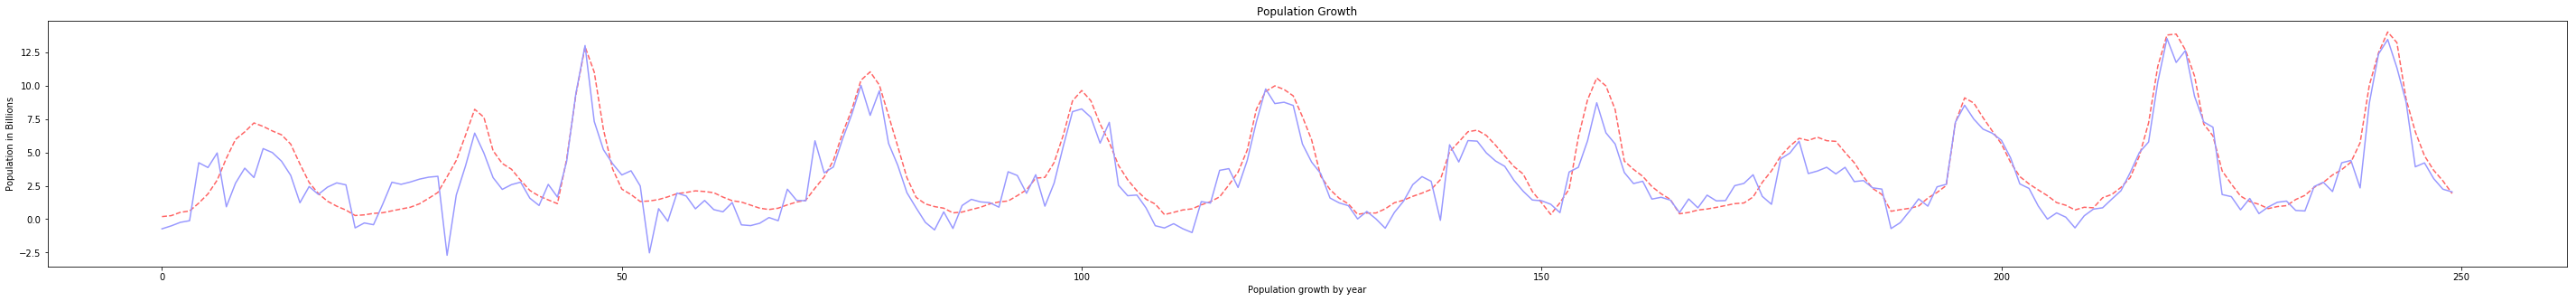

In [12]:

fig= plt.figure(figsize=(50,5))

ind = [i for i in range(y_train.shape[0])]
indices = np.array(ind)
plt.plot(indices,y_train,'--',color=(255/255,100/255,100/255))
plt.plot(indices,y_train_predicted,color=(.6,.6,1))
plt.ylabel("Population in Billions")
plt.xlabel("Population growth by year")
plt.title("Population Growth")
plt.show

In [13]:
X_train = pd.read_csv(x_train_file_path).values
y_train = pd.read_csv(y_train_file_path).values
X_test = pd.read_csv(x_test_file_path).values
y_test = pd.read_csv(y_test_file_path).values

We then have to set up the instance of the Random Forest.

In [14]:
mean_rule = sg.create_combination_rule("MeanRule")
rand_forest = sg.create_machine("RandomForest", labels=labels_train, num_bags=5,
                                seed=1, combination_rule=mean_rule)

Finally we have to train and apply the model.

In [15]:
rand_forest.train(features_train)
# model_file_path = Path.cwd() / 'sample_austria_model.json'
# sg.serialize(str(model_file_path.absolute()), rand_forest, sg.JsonSerializer())

True

In [16]:
# rand = sg.as_machine(sg.deserialize(str(model_file_path.absolute()), sg.JsonDeserializer()))

In [17]:
labels_predict = rand_forest.apply_regression(features_test)

In [18]:
labels_train_predict = rand_forest.apply_regression(features_train)


We also find the mean squared error of this model as a measure of its accuracy

In [19]:
mse = sg.create_evaluation("MeanSquaredError")
rand_forest.put("oob_evaluation_metric", mse)
oob = rand_forest.get("oob_error")
mserror = mse.evaluate(labels_predict, labels_test)
print('Mean Squared Error for Random Forest(Regression) is '+str(mserror))

Mean Squared Error for Random Forest(Regression) is 3.401850951612904


Before we plot them, we have to convert all the labels into numpy style arrays.

In [20]:
y_train_predicted = labels_train_predict.get("labels").reshape(labels_train_predict.get("labels").shape[0])
y_test_predicted = labels_predict.get("labels").reshape(labels_predict.get("labels").shape[0])
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

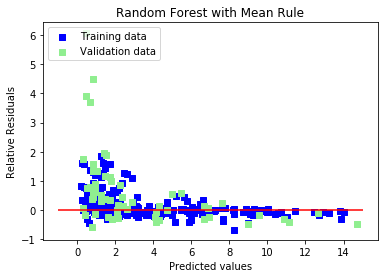

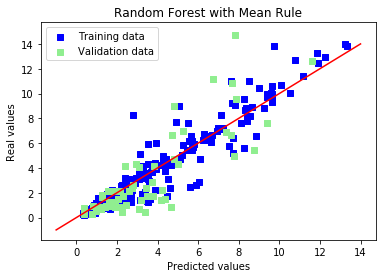

In [21]:
# Plot residuals
plt.scatter(y_train, (y_train_predicted - y_train)/y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, (y_test_predicted - y_test)/y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Random Forest with Mean Rule")
plt.xlabel("Predicted values")
plt.ylabel("Relative Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = -1, xmax = 15, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_predicted, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_predicted, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Random Forest with Mean Rule")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([-1, 14], [-1, 14], c = "red")
plt.show()

Lets have a loop that checks which is better for the different countries, random forest or Linear Ridge.

In [22]:
lrr_mse = {}
rf_mse = {}
poisson_mse = {}
alpha = {
    'austria':19.5,
    'belgium':84,
    'germany':37.5,
    'italy':57,
    'netherlands':84
}

for austria
	Pearson coefficient using lrr = (0.6867038240758435, 1.991070670339436e-05)
	Pearson coefficient using random forest = (0.6695312770167974, 3.8050554619057206e-05)
	Pearson coefficient using Poisson = (0.07365920635970556, 0.6937291777810509)
	MSE using LRR = 190360.77712497485
	MSE using random forest = 113372.41470928464
	MSE using Poisson = 340015.0975463588
for belgium
	Pearson coefficient using lrr = (0.5902944813803916, 4.106709632246724e-06)
	Pearson coefficient using random forest = (0.4782936182143384, 0.00033537987711358783)
	Pearson coefficient using Poisson = (0.4639756691866296, 0.0005311940233139929)
	MSE using LRR = 28460.925345862717
	MSE using random forest = 27269.61490699769
	MSE using Poisson = 24360.995012732263
for germany
	Pearson coefficient using lrr = (0.3751981437538705, 0.002657604801281389)
	Pearson coefficient using random forest = (0.8147685733519959, 7.809416103712278e-16)
	Pearson coefficient using Poisson = (0.9086531050232232, 1.967040931

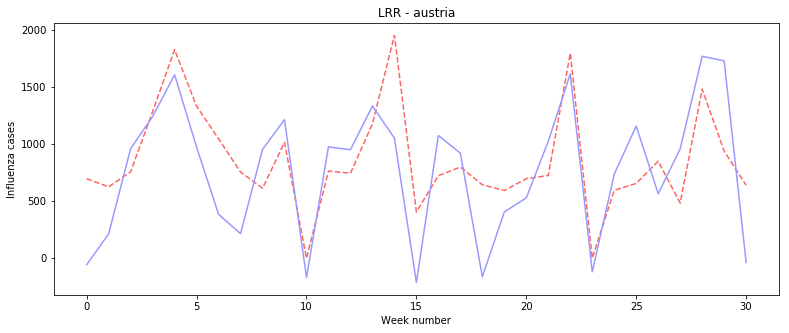

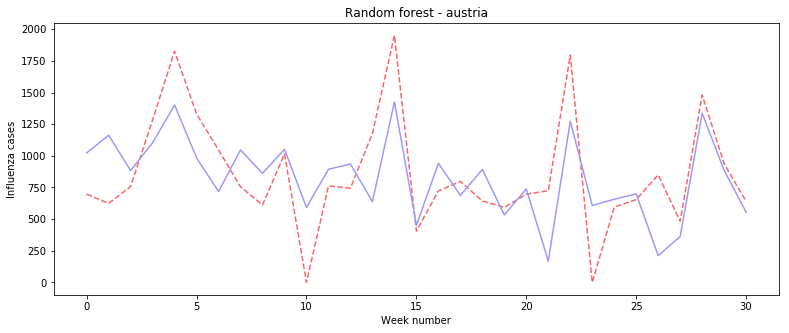

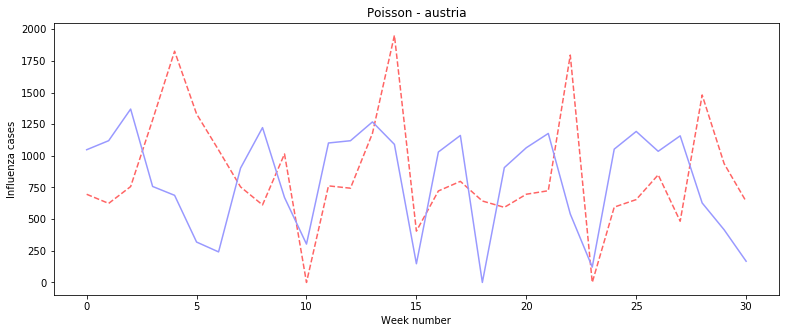

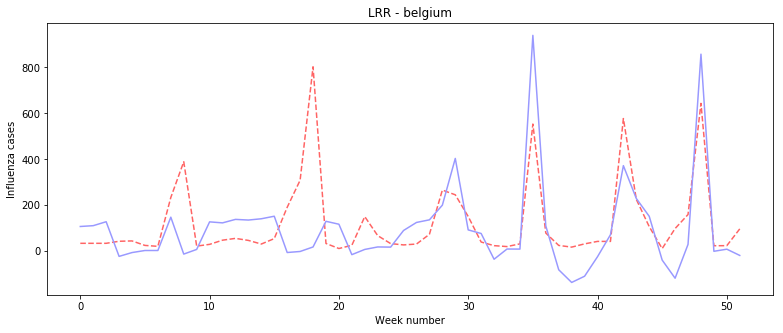

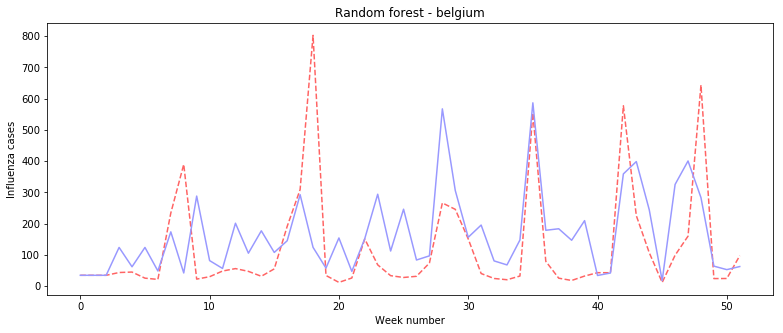

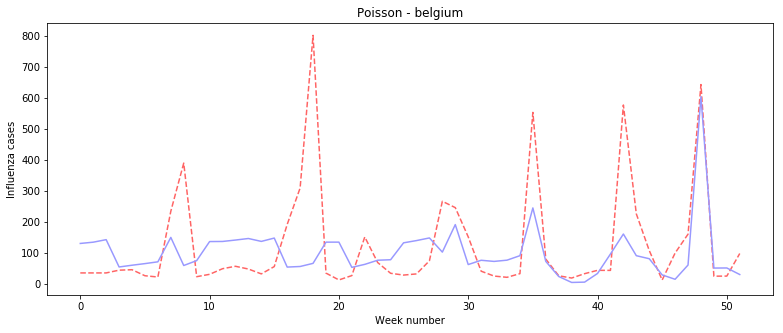

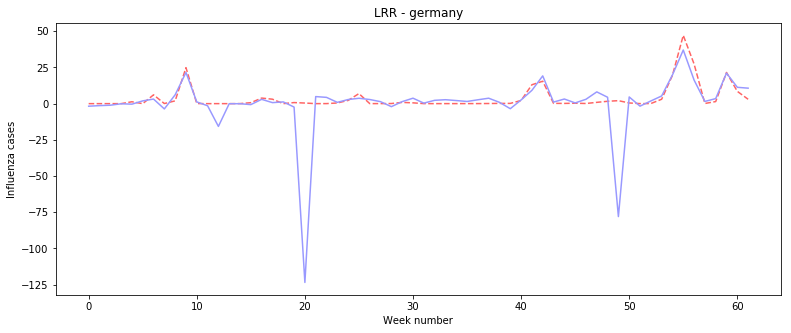

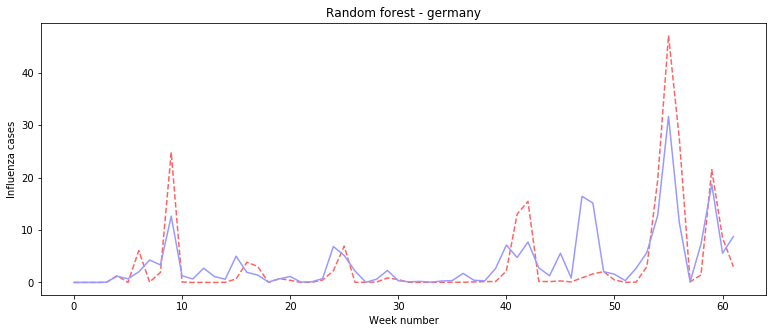

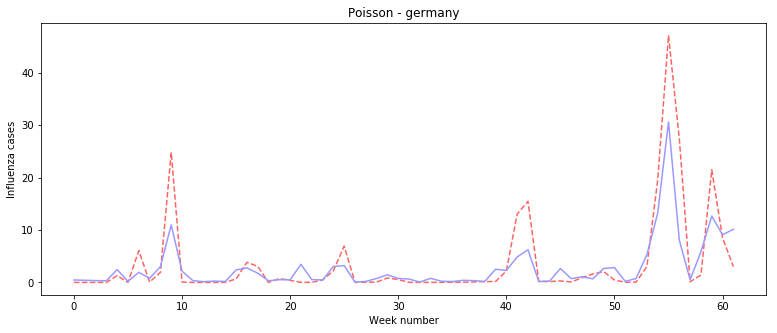

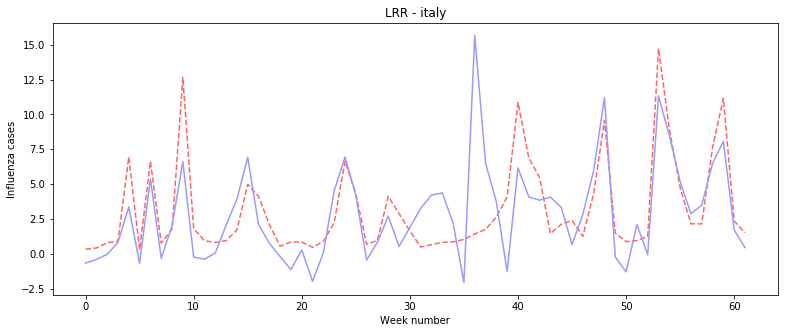

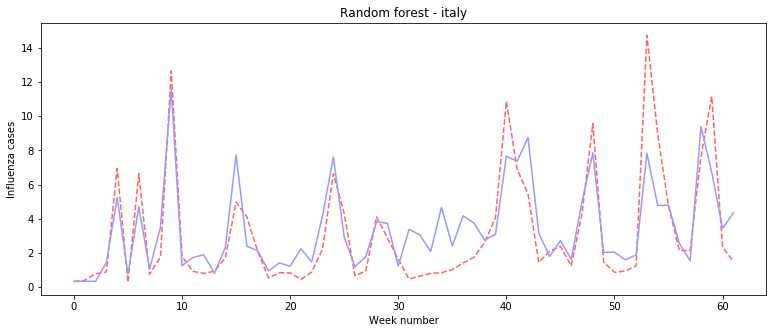

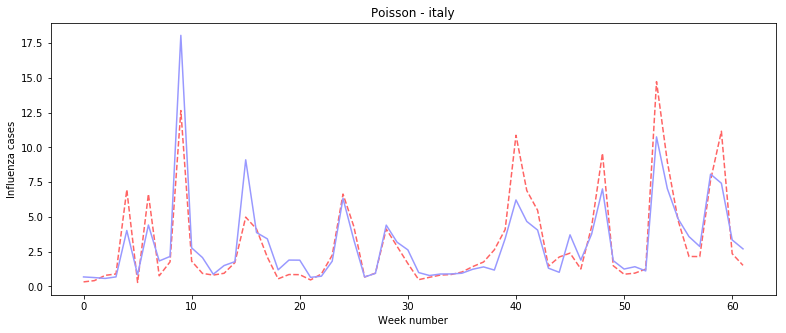

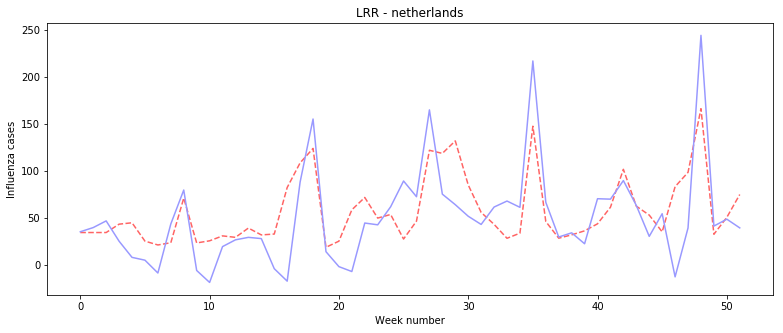

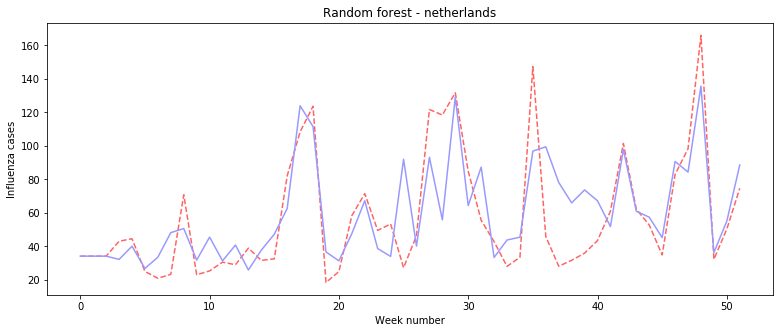

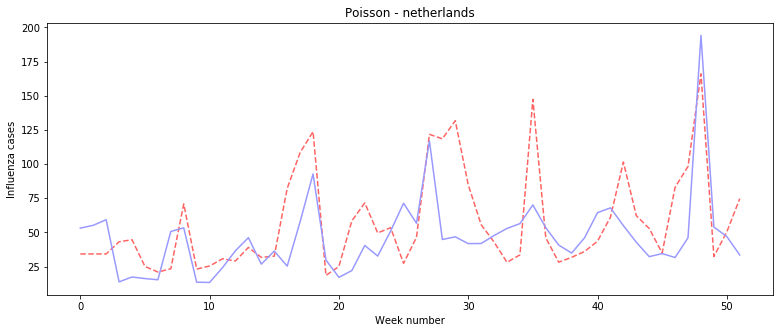

In [27]:
COUNTRIES = ['austria', 'belgium', 'germany', 'italy', 'netherlands']

for country in COUNTRIES:
    print('for '+country)
    test_data_path = path.parent / 'data' / 'test' / country
    x_train_file_path = test_data_path / 'X_train.csv'
    y_train_file_path = test_data_path / 'y_train.csv'
    x_test_file_path = test_data_path / 'X_test.csv'
    y_test_file_path = test_data_path / 'y_test.csv'

    X_train = pd.read_csv(x_train_file_path).values
    y_train = pd.read_csv(y_train_file_path).values
    X_test = pd.read_csv(x_test_file_path).values
    y_test = pd.read_csv(y_test_file_path).values

    features_train = sg.create_features(load(x_train_file_path).T)
    features_test = sg.create_features(load(x_test_file_path).T)
    labels_train = sg.create_labels(load(y_train_file_path, is_labels=True))
    labels_test = sg.create_labels(load(y_test_file_path, is_labels=True))

    lrr = sg.create_machine("LinearRidgeRegression", tau=alpha[country], labels=labels_train, use_bias=False)
    strategy = sg.create_splitting_strategy("CrossValidationSplitting", labels=labels_train,
                                        num_subsets=5, seed=1)

    evaluation_criterium = sg.create_evaluation("MeanSquaredError")
    cross_validation = sg.create_machine_evaluation("CrossValidation", machine=lrr,
                                                features=features_train, labels=labels_train,
                                                splitting_strategy=strategy,
                                                evaluation_criterion=evaluation_criterium,
                                                num_runs=10)
    result = cross_validation.evaluate()
    lrr.train(features_train)
    labels_predict = lrr.apply(features_test)
    labels_train_predict = lrr.apply(features_train)
    eval = sg.create_evaluation("MeanSquaredError")
    lrr_mse[country] = eval.evaluate(labels_predict, labels_test)

    y_train_predicted = labels_train_predict.get("labels").reshape(labels_train_predict.get("labels").shape[0])
    y_test_predicted = labels_predict.get("labels").reshape(labels_predict.get("labels").shape[0])
    y_train = y_train.reshape(y_train.shape[0])
    y_test = y_test.reshape(y_test.shape[0])

    pearson_lrr = stats.pearsonr(y_test, y_test_predicted)
    print('\tPearson coefficient using lrr = '+str(pearson_lrr))
    
    fig= plt.figure(figsize=(13,5))

    ind = [i for i in range(y_test.shape[0])]
    indices = np.array(ind)
    plt.plot(indices,y_test,'--',color=(255/255,100/255,100/255))
    plt.plot(indices,y_test_predicted,color=(.6,.6,1))
    plt.ylabel("Influenza cases")
    plt.xlabel("Week number")
    plt.title("LRR - "+country)
    plt.show



    mean_rule = sg.create_combination_rule("MeanRule")
    rand_forest = sg.create_machine("RandomForest", labels=labels_train, num_bags=5,
                                seed=1, combination_rule=mean_rule)

    rand_forest.train(features_train)


    labels_predict = rand_forest.apply_regression(features_test)
    labels_train_predict = rand_forest.apply_regression(features_train)

    mse = sg.create_evaluation("MeanSquaredError")
    rand_forest.put("oob_evaluation_metric", mse)
    oob = rand_forest.get("oob_error")
    rf_mse[country] = mse.evaluate(labels_predict, labels_test)



    # if rf_mse[country] < lrr_mse[country]:
    #     print(country + ':\tRandom Forest')
    # else:
    #     print(country + ':\tLinear Ridge Regression')

    y_train_predicted = labels_train_predict.get("labels").reshape(labels_train_predict.get("labels").shape[0])
    y_test_predicted = labels_predict.get("labels").reshape(labels_predict.get("labels").shape[0])
    y_train = y_train.reshape(y_train.shape[0])
    y_test = y_test.reshape(y_test.shape[0])

    pearson_rf = stats.pearsonr(y_test, y_test_predicted)
    
    



    print('\tPearson coefficient using random forest = '+str(pearson_rf))
    
    fig= plt.figure(figsize=(13,5))

    ind = [i for i in range(y_test.shape[0])]
    indices = np.array(ind)
    plt.plot(indices,y_test,'--',color=(255/255,100/255,100/255))
    plt.plot(indices,y_test_predicted,color=(.6,.6,1))
    plt.ylabel("Influenza cases")
    plt.xlabel("Week number")
    plt.title("Random forest - "+country)
    plt.show
    
    
    
    glm = sg.create_machine("GLM", labels=labels_train, alpha=0.17,
                     learning_rate=0.002, max_iterations=10000, tolerance=0.000001, eta=0.2)
    glm.put("lambda", 0.001)
    glm.train(features_train)
    labels_predict = glm.apply(features_test)
    labels_train_predict = glm.apply(features_train)
    eval = sg.create_evaluation("MeanSquaredError")
    poisson_mse[country] = eval.evaluate(labels_predict, labels_test)
    y_train_predicted = labels_train_predict.get("labels").reshape(labels_train_predict.get("labels").shape[0])
    y_test_predicted = labels_predict.get("labels").reshape(labels_predict.get("labels").shape[0])
    y_train = y_train.reshape(y_train.shape[0])
    y_test = y_test.reshape(y_test.shape[0])

    pearson_poisson = stats.pearsonr(y_test, y_test_predicted)
    
    print('\tPearson coefficient using Poisson = '+str(pearson_poisson))
    
    fig= plt.figure(figsize=(13,5))

    ind = [i for i in range(y_test.shape[0])]
    indices = np.array(ind)
    plt.plot(indices,y_test,'--',color=(255/255,100/255,100/255))
    plt.plot(indices,y_test_predicted,color=(.6,.6,1))
    plt.ylabel("Influenza cases")
    plt.xlabel("Week number")
    plt.title("Poisson - "+country)
    plt.show


    print('\tMSE using LRR = '+str(lrr_mse[country]))
    print('\tMSE using random forest = '+str(rf_mse[country]))
    print('\tMSE using Poisson = '+str(poisson_mse[country]))

    # # Plot residuals
    # plt.scatter(y_train, (y_train_predicted - y_train)/y_train, c = "blue", marker = "s", label = "Training data")
    # plt.scatter(y_test, (y_test_predicted - y_test)/y_test, c = "lightgreen", marker = "s", label = "Validation data")
    # plt.title(country+": Random Forest with Mean Rule")
    # plt.xlabel("Predicted values")
    # plt.ylabel("Relative Residuals")
    # plt.legend(loc = "upper left")
    # plt.hlines(y = 0, xmin = -1, xmax = 15, color = "red")
    # plt.show()
    #
    # # Plot predictions
    # plt.scatter(y_train_predicted, y_train, c = "blue", marker = "s", label = "Training data")
    # plt.scatter(y_test_predicted, y_test, c = "lightgreen", marker = "s", label = "Validation data")
    # plt.title(country+": Random Forest with Mean Rule")
    # plt.xlabel("Predicted values")
    # plt.ylabel("Real values")
    # plt.legend(loc = "upper left")
    # plt.plot([-1, 14], [-1, 14], c = "red")
    # plt.show()

Hence we conclude that Random forest is the better model for all the countries.